In [25]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from math import sqrt, pi, exp
import seaborn as sns; sns.set_theme()
from canny import *

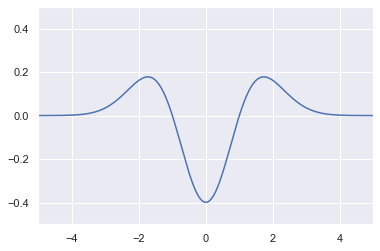

In [2]:
# Question 2a
x = np.arange(-5, 5, 0.01)
coeff = (np.square(x)-1)*(1/sqrt(2*pi))
y = (coeff)*np.exp((-1/2)*np.square(x))
plt.plot(x, y)
plt.axis([-5, 5, -0.5, 0.5])
plt.show()

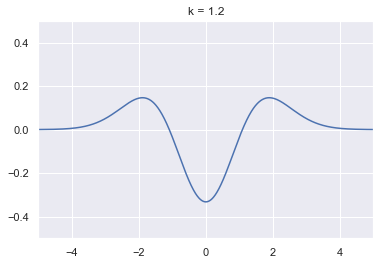

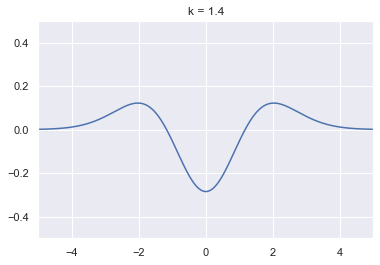

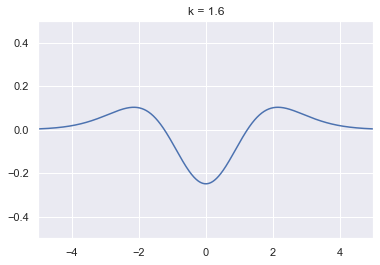

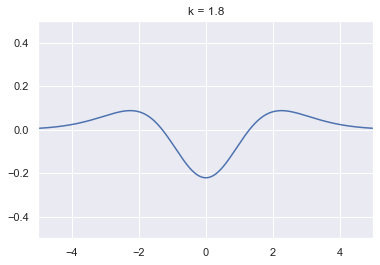

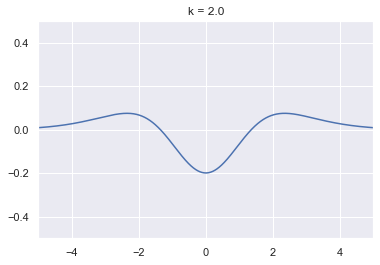

In [3]:
def gaussian(k):
    return np.exp(np.square(x) / (-2*k*k)) / (sqrt(2*pi)*k)

for k in [1.2, 1.4, 1.6, 1.8, 2.0]:
    x = np.arange(-5, 5, 0.01)
    y = (gaussian(k) - gaussian(1)) / (k-1)
    plt.plot(x, y)
    plt.axis([-5, 5, -0.5, 0.5])
    plt.title("k = " + str(k))
    plt.show()

In [4]:
# Question 6
sigma = 1
k = cv2.getGaussianKernel(5,sigma)
print(k)

[[0.05448868]
 [0.24420134]
 [0.40261995]
 [0.24420134]
 [0.05448868]]


Gpy [[ 0.00083097  0.00156296  0.0027388   0.00446339  0.00674887  0.00943658
   0.01214227  0.01426946  0.01512317  0.01411582  0.01100204  0.00604169
   0.         -0.00604169 -0.01100204 -0.01411582 -0.01512317 -0.01426946
  -0.01214227 -0.00943658 -0.00674887 -0.00446339 -0.0027388  -0.00156296
  -0.00083097]] (1, 25)
GTx [[0.00110796]
 [0.00227339]
 [0.00438208]
 [0.00793491]
 [0.01349774]
 [0.02156933]
 [0.0323794 ]
 [0.04566227]
 [0.06049268]
 [0.07528436]
 [0.08801633]
 [0.09666703]
 [0.09973557]
 [0.09666703]
 [0.08801633]
 [0.07528436]
 [0.06049268]
 [0.04566227]
 [0.0323794 ]
 [0.02156933]
 [0.01349774]
 [0.00793491]
 [0.00438208]
 [0.00227339]
 [0.00110796]] (25, 1)
Gy [[0.00110796 0.00227339 0.00438208 0.00793491 0.01349774 0.02156933
  0.0323794  0.04566227 0.06049268 0.07528436 0.08801633 0.09666703
  0.09973557 0.09666703 0.08801633 0.07528436 0.06049268 0.04566227
  0.0323794  0.02156933 0.01349774 0.00793491 0.00438208 0.00227339
  0.00110796]]
magnitude of gradient


/opt/anaconda3/envs/cos429/lib/python3.7/site-packages/ipykernel_launcher.py:66: RuntimeWarning: divide by zero encountered in true_divide


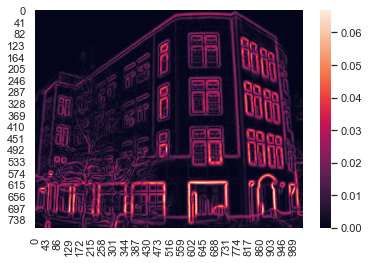

In [241]:
img = cv2.imread('example_images/csbldg.jpg', 1)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('image_gray', gray)
cv2.imwrite("test-out.jpeg", gray)
gray = np.array(gray/255.0)

# finding the derivative of a function convolved with a Gaussian is the same
# as convolving with the derivative of a Gaussian

def gauss(sigma): # get vertical 1d gaussian
    half_size = 3*sigma

    dim = 2*half_size+1

    k = np.arange(-half_size, half_size+1, 1)

    return np.exp(np.square(k) / (-2*sigma**2)) / (sqrt(2*pi)*sigma)


def deriv_gauss(sigma): # get vertical 1d gaussian derivative
    half_size = 3*sigma

    dim = 2*half_size+1
    k = np.arange(-half_size, half_size+1, 1)

    return np.exp(np.square(k) / (-2*sigma**2)) * (-k / (sqrt(2*pi)*sigma**3))


Gpy = np.expand_dims(deriv_gauss(4), axis=0)     # horizontal derivative of a Gaussian
GTx = np.expand_dims(gauss(4), axis=1)            # vertical gaussian
Gy = np.expand_dims(gauss(4), axis=0)             # horizontal Gaussian
GpTx = np.expand_dims(deriv_gauss(4), axis=1)   # vertical derivative of Gaussian

print("Gpy", Gpy, Gpy.shape)
print("GTx", GTx, GTx.shape)
print("Gy", Gy)
# print(Gy[4])
Fx = cv2.filter2D((cv2.filter2D(gray, -1, GTx)), -1, Gpy)
# Fx = cv2.filter2D(gray,-1,cv2.filter2D(Gpy,-1,GTx))
Fy = cv2.filter2D((cv2.filter2D(gray, -1, GpTx)), -1, Gy)

# kernel = gauss(1)
# print("kernel", kernel)
# # deriv of gaussian in x direction
# print(kernel)
# xconv = np.array([[-1, 1, 0]])
# dx = cv2.filter2D(kernel,-1,xconv)
# print("dx", dx)
# fx = cv2.filter2D(gray,-1,dx)
# print("fx", fx)
# # print(fx.shape)
# cv2.imwrite("fx.jpeg", Fx*255)

# # deriv of gaussian in y direction
# yconv = np.array([[-1], [1], [0]])
# dy = cv2.filter2D(kernel,-1,yconv)
# # print("dy", dy)
# fy = cv2.filter2D(gray,-1,dy)
# # print("fy", fy)
# print(fy.shape)
# cv2.imwrite("fy.jpeg", Fy*255)

# Computer edge strength and edge orientation at each pixel.
def edge_str_ori(fx, fy, img):
    F = np.sqrt(np.square(fx) + np.square(fy))
    div = fy / fx
    D = np.arctan(div)
    D = np.where(D > 0, D, D+pi)
    return F, D

F, D = edge_str_ori(Fx, Fy, gray)
print("magnitude of gradient")
ax1 = sns.heatmap(F)


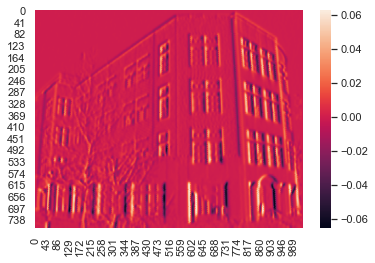

In [242]:
ax01 = sns.heatmap(Fx)

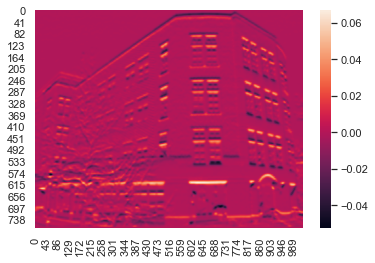

In [243]:
ax02 = sns.heatmap(Fy)

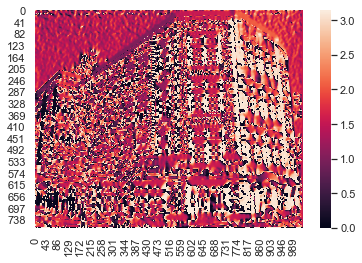

In [244]:
ax2 = sns.heatmap(D)

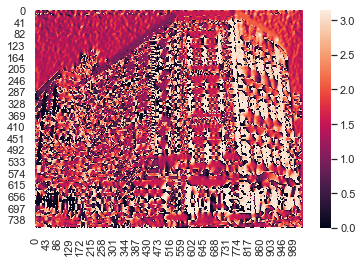

In [236]:
for i in range(D.shape[0]):
    for j in range(D.shape[1]):
        if D[i][j]<0:
            D[i][j]+=pi
ax21 = sns.heatmap(D)

[[0.78539816 0.         0.         ... 2.35619449 2.35619449 2.35619449]
 [1.57079633 2.35619449 2.35619449 ... 1.57079633 1.57079633 1.57079633]
 [1.57079633 2.35619449 2.35619449 ... 1.57079633 1.57079633 1.57079633]
 ...
 [1.57079633 1.57079633 1.57079633 ... 2.35619449 2.35619449 1.57079633]
 [1.57079633 1.57079633 1.57079633 ... 2.35619449 2.35619449 1.57079633]
 [0.         2.35619449 2.35619449 ... 0.         0.         0.        ]]
direction of gradient (4 options)


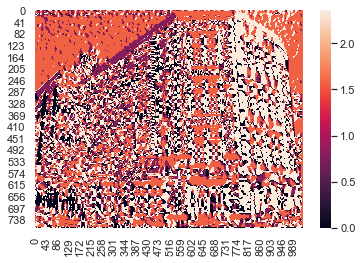

In [230]:
# For each pixel, find the direction 𝐷∗∈0,𝜋/4,𝜋/2,3𝜋/4 that is closest to the orientation 𝐷 at that pixel.
angles = np.array([0, pi/4, pi/2, 3*pi/4])
D_prime = np.zeros(D.shape)
for i in range(D.shape[0]):
    for j in range(D.shape[1]):
        D_prime[i][j] = angles[np.abs(angles - D[i][j]).argmin()]
print(D_prime)
print("direction of gradient (4 options)")
ax3 = sns.heatmap(D_prime)

after NMS


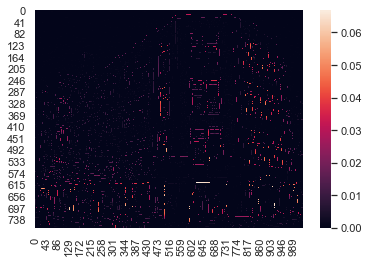

In [231]:
# If the edge strength 𝐹(𝑥,𝑦) is smaller than at least one of its neighbors along 𝐷∗, 
# set 𝐼(𝑥,𝑦)=0, else set 𝐼(𝑥,𝑦)=𝐹(𝑥,𝑦).

I = np.zeros(gray.shape)
for i in range(I.shape[0]):
    for j in range(I.shape[1]):
        if D_prime[i][j] == 0:
            n1, n2 = (i, max(0,j-1)), (i, min(I.shape[1]-1,j+1))
        elif D_prime[i][j] == pi/4:
            n1, n2 = (max(0,i-1), min(I.shape[1]-1,j+1)), (min(I.shape[0]-1, i+1), max(0,j-1))
        elif D_prime[i][j] == pi/2:
            n1, n2 = (max(0,i-1), j), (min(I.shape[0]-1, i+1), j)
        else:
            n1, n2 = (max(0,i-1), max(0,j-1)), (min(I.shape[0]-1, i+1), min(I.shape[1]-1,j+1))
            
        if F[i][j] >= F[n1] and F[i][j] >= F[n2]:
            I[i][j] = F[i][j]
            
print("after NMS")
ax4 = sns.heatmap(I)

normalized I


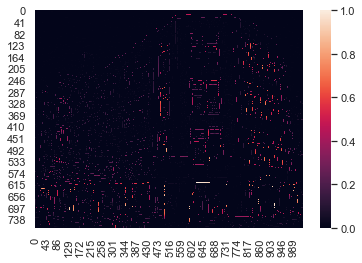

In [210]:
edgemap = np.zeros(I.shape)
I_normal = I / np.amax(I)
print("normalized I")
ax44 = sns.heatmap(I_normal)

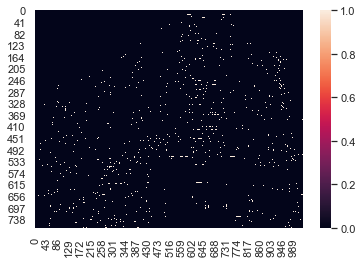

In [175]:

th = 0.1
tl = 0
for i in range(I.shape[0]):
    for j in range(I.shape[1]):
        if I_normal[i][j] > th:
#             edgemap[i][j] = 1
            to_check = [(i,j)]
            while(to_check):
                p = to_check.pop(0)
                if edgemap[p] == 0:
                    if D_prime[i][j] == 0:
                        n1, n2 = (max(0,p[0]-1), p[1]), (min(I.shape[0]-1, p[0]+1), p[1])
                    elif D_prime[i][j] == pi/4:
                        n1, n2 = (max(0,p[0]-1), max(0,p[1]-1)), (min(I.shape[0]-1, p[0]+1), min(I.shape[1]-1,p[1]+1))
                    elif D_prime[i][j] == pi/2:
                        n1, n2 = (p[0], max(0,p[1]-1)), (p[0], min(I.shape[1]-1,p[1]+1))
                    else:
                        n1, n2 = (max(0,p[0]-1), min(I.shape[1]-1,p[1]+1)), (min(I.shape[0]-1, p[0]+1), max(0,p[1]-1))
                    if I_normal[n1] > tl:
                        to_check.append(n1)
                        edgemap[n1] = 1
                    if I_normal[n2] > tl:
                        to_check.append(n2)
                        edgemap[n2] = 1
                    
ax5 = sns.heatmap(edgemap)

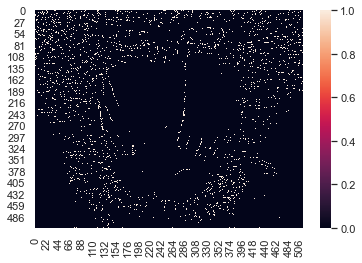

In [176]:
img_mandrill = cv2.imread('example_images/mandrill.jpg', 1)
gray_mandrill = cv2.cvtColor(img_mandrill, cv2.COLOR_BGR2GRAY)
edgemap_mandrill = cannyEdgeDetection(gray_mandrill, sigma, 0.2, 0.8)
ax6 = sns.heatmap(edgemap_mandrill)

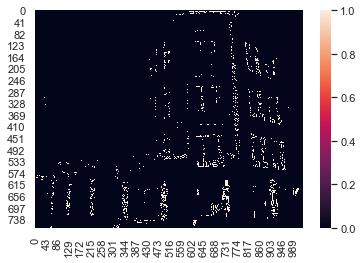

In [12]:
img_cs = cv2.imread('example_images/csbldg.jpg', 1)
gray_cs = cv2.cvtColor(img_cs, cv2.COLOR_BGR2GRAY)
edgemap_cs = cannyEdgeDetection(gray_cs, 5, 0.5, 0.7)
ax7 = sns.heatmap(edgemap_cs)